One of the most common problem data science professionals face is to avoid **overfitting**. Have you come across a situation where your model performed exceptionally well on train data, but was not able to predict test data. Or you were on the top of a competition in public leaderboard, only to fall hundreds of places in the final rankings? Well – this is the kernel for you!.

# Table of Contents
1. What is Regularization?
2. How does Regularization help in reducing Overfitting?
3. Different Regularization techniques in Deep Learning
    - L2 and L1 regularization
    - Dropout
    - Data augmentation
    - Early stopping



# What is Regularization?
Before we deep dive into the topic, take a look at this image:
![](https://i.ibb.co/g35FMM5/over.png)
Have you seen this image before? As we move towards the right in this image, our model tries to learn too well the details and the noise from the training data, which ultimately results in poor performance on the unseen data.

In other words, while going towards the right, the complexity of the model increases such that the training error reduces but the testing error doesn’t. This is shown in the image below.
![](https://i.ibb.co/0cygV4y/Screen-Shot-2018-04-04-at-2-43-37-PM-768x592.png)

If you’ve built a neural network before, you know how complex they are. This makes them more prone to overfitting.

**Regularization** is a technique which makes slight modifications to the learning algorithm such that the model generalizes better. This in turn improves the model’s performance on the unseen data as well.

# How does Regularization help reduce Overfitting?

Let’s consider a neural network which is overfitting on the training data.
![](https://i.ibb.co/gmRzQtr/over-fitting.png)
If you have studied the concept of regularization in machine learning, you will have a fair idea that **regularization penalizes the coefficients. In deep learning, it actually penalizes the weight matrices of the nodes.**

Assume that our regularization coefficient is so high that some of the weight matrices are nearly equal to zero.
This will result in a much simpler linear network and slight underfitting of the training data.

Such a large value of the regularization coefficient is not that useful. We need to optimize the value of regularization coefficient in order to obtain a well-fitted model as shown in the image below.
![](https://i.ibb.co/CKBYWFK/under.png)

In [1]:

#data preprocessing
import pandas as pd
#math operations
import numpy as np
#machine learning

from sklearn.preprocessing import StandardScaler
#hyperparameter optimization
from sklearn.model_selection import GridSearchCV
#support vector machine model
from keras import regularizers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import cv2
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
            
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
import random

Using TensorFlow backend.


In [2]:
data=[]
labels=[]
Parasitized=os.listdir("../input/cell_images/cell_images/Parasitized/")
for a in Parasitized:
    try:
        image=cv2.imread("../input/cell_images/cell_images/Parasitized/"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Uninfected=os.listdir("../input/cell_images/cell_images/Uninfected/")
for b in Uninfected:
    try:
        image=cv2.imread("../input/cell_images/cell_images/Uninfected/"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")

In [3]:
Cells=np.array(data)
labels=np.array(labels)

In [4]:
np.save("Cells",Cells)
np.save("labels",labels)

In [5]:
Cells=np.load("Cells.npy")
labels=np.load("labels.npy")

In [6]:
s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [7]:
num_classes=len(np.unique(labels))
len_data=len(Cells)


In [8]:
(x_train,x_test)=Cells[(int)(0.1*len_data):],Cells[:(int)(0.1*len_data)]
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [9]:
(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

In [10]:
#Doing One hot encoding as classifier has multiple classes
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

# Different Regularization Techniques in Deep Learning

Now that we have an understanding of how regularization helps in reducing overfitting, we’ll learn a few different techniques in order to apply regularization in deep learning.

## L2 & L1 regularization

L1 and L2 are the most common types of regularization. These update the general cost function by adding another term known as the regularization term.

### Cost function = Loss (say, binary cross entropy) + Regularization term

Due to the addition of this regularization term, the values of weight matrices decrease because it assumes that a neural network with smaller weight matrices leads to simpler models. Therefore, it will also reduce overfitting to quite an extent.

However, this regularization term differs in L1 and L2.

In L2, we have:
![L2](https://i.ibb.co/b3Dp6mL/L2.png)

Here, **lambda** is the regularization parameter. It is the hyperparameter whose value is optimized for better results. L2 regularization is also known as weight decay as it forces the weights to decay towards zero (but not exactly zero).

In L1, we have:

![L2](https://i.ibb.co/zZBJrgB/l1.png)

In this, we penalize the absolute value of the weights. Unlike L2, the weights may be reduced to zero here. **Hence, it is very useful when we are trying to compress our model. Otherwise, we usually prefer L2 over it.**

In keras, we can directly apply regularization to any layer using the regularizers.
Below I have applied regularizer on dense layer having 500 neurons and relu activation function.

In [11]:
#creating sequential model
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
#l2 regularizer
model.add(Dense(500,kernel_regularizer=regularizers.l2(0.01),activation="relu"))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 


**Note: Here the value 0.01 is the value of regularization parameter, i.e., lambda, which we need to optimize further. We can optimize it using the grid-search method.**

Similarly, we can also apply L1 regularization.

# Dropout
This is the one of the most interesting types of regularization techniques. It also produces very good results and is consequently the most frequently used regularization technique in the field of deep learning.

To understand dropout, let’s say our neural network structure is akin to the one shown below:
![](https://i.ibb.co/G3PgsRs/d1.png)

So what does dropout do? At every iteration, it randomly selects some nodes and removes them along with all of their incoming and outgoing connections as shown below.

![](https://i.ibb.co/4pdnr5r/d2.png)

So each iteration has a different set of nodes and this results in a different set of outputs. **It can also be thought of as an ensemble technique in machine learning.**

Ensemble models usually perform better than a single model as they capture more randomness. Similarly, dropout also performs better than a normal neural network model.

This probability of choosing how many nodes should be dropped is the hyperparameter of the dropout function. As seen in the image above, dropout can be applied to both the hidden layers as well as the input layers.

![](https://i.ibb.co/KydYCbp/d3.gif)

Due to these reasons, dropout is usually preferred when we have a large neural network structure in order to introduce more **randomness.**

In keras, we can implement dropout using the **keras  layer**. Below is the Dropout Implementation.
I have introduced dropout of 0.2  as the probability of dropping in my neural network architecture after last hidden layer having 64 kernels and after first dense layer having 500 neurons.





In [12]:
#creating sequential model
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
# 1st dropout
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
# 2nd dropout
model.add(Dropout(0.2))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 


# Data Augmentation
The simplest way to reduce overfitting is to increase the size of the training data. In machine learning, we were not able to increase the size of training data as the labeled data was too costly.

But, now let’s consider we are dealing with images. In this case, there are a few ways of increasing the size of the training data – rotating the image, flipping, scaling, shifting, etc. In the below image, some transformation has been done on the handwritten digits dataset.
![](https://i.ibb.co/rd4FpW6/aug.png)

This technique is known as **data augmentation**. This usually provides a big leap in improving the accuracy of the model. It can be considered as a mandatory trick in order to improve our predictions.

In keras, we can perform all of these transformations using **ImageDataGenerator**. It has a big list of arguments which you you can use to pre-process your training data.

Below is the implementation code.

In [13]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

# Early stopping
Early stopping is a kind of cross-validation strategy where we keep one part of the training set as the validation set. When we see that the performance on the validation set is getting worse, we immediately stop the training on the model. This is known as **early stopping.**

![](https://i.ibb.co/CmJpR3R/early.png)
In the above image, we will stop training at the dotted line since after that our model will start overfitting on the training data.

In keras, we can apply early stopping using the **callbacks** function. Below is the implementation code for it.I have applied early stopping so that it will stop immendiately if validation error will not decreased after 3 epochs.

In [14]:
from keras.callbacks import EarlyStopping
earlystop= EarlyStopping(monitor='val_acc', patience=3)
epochs = 20 # 
batch_size = 256

Here, **monitor** denotes the quantity that needs to be monitored and **‘val_err’** denotes the validation error.

**Patience** denotes the number of epochs with no further improvement after which the training will be stopped. For better understanding, let’s take a look at the above image again. After the dotted line, each epoch will result in a higher value of validation error. Therefore, 5 epochs after the dotted line (since our patience is equal to 3), our model will stop because no further improvement is seen.

**Note: It may be possible that after 3 epochs (this is the value defined for patience in general), the model starts improving again and the validation error starts decreasing as well. Therefore, we need to take extra care while tuning this hyperparameter.**

# Implementation on Malaria Cell Identification with keras
By this point, you should have a theoretical understanding of the different techniques we have gone through. We will now apply this knowledge to our deep learning practice problem – Identify Malaria cell. 
In this problem I will use all the regularization techniques which I have discussed earlier i.e., 
1. L1,L2 Regularizer
2. Dropout
3. Data Augmentation
4. Early Stopping
Now Let's start firing bullets !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [15]:
#creating sequential model
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
# 1st dropout
model.add(Dropout(0.2))
model.add(Flatten())
#l2 regularizer
model.add(Dense(500,kernel_regularizer=regularizers.l2(0.01),activation="relu"))
# 2nd dropout
model.add(Dropout(0.2))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 50, 50, 16)        208       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 25, 25, 32)        2080      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 6, 64)          0         
__________

In [16]:
# Compiling model
# compile the model with loss as categorical_crossentropy and using adam optimizer you can test result by trying RMSProp as well as Momentum
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# Fit the model
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[earlystop])

Epoch 1/20
96/96 [==============================] - 37s 384ms/step - loss: 1.8363 - acc: 0.6534 - val_loss: 0.5456 - val_acc: 0.7572
Epoch 2/20
96/96 [==============================] - 35s 365ms/step - loss: 0.4570 - acc: 0.8349 - val_loss: 0.4226 - val_acc: 0.8726
Epoch 3/20
96/96 [==============================] - 35s 365ms/step - loss: 0.3233 - acc: 0.9018 - val_loss: 0.3744 - val_acc: 0.8940
Epoch 4/20
96/96 [==============================] - 35s 362ms/step - loss: 0.2808 - acc: 0.9165 - val_loss: 0.2909 - val_acc: 0.9136
Epoch 5/20
96/96 [==============================] - 35s 367ms/step - loss: 0.2674 - acc: 0.9218 - val_loss: 0.2328 - val_acc: 0.9379
Epoch 6/20
96/96 [==============================] - 35s 368ms/step - loss: 0.2563 - acc: 0.9309 - val_loss: 0.2461 - val_acc: 0.9310
Epoch 7/20
96/96 [==============================] - 35s 364ms/step - loss: 0.2495 - acc: 0.9344 - val_loss: 0.2504 - val_acc: 0.9336
Epoch 8/20
96/96 [==============================] - 34s 359ms/step - 

### !!! Great we achived 95.10% validation accuracy

Now plot confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

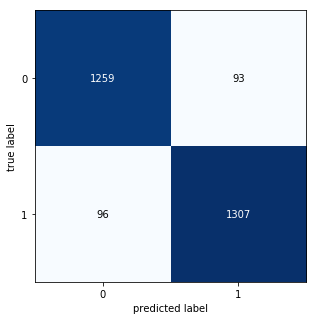

In [19]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [20]:
Recall=1298/(1298+87)
Recall

0.9371841155234657

In [21]:
Precision = 1298/(1298+48)
Precision

0.9643387815750372

# Please hit Upvote if you really like this kernel.